## 군집화 : 군집 평가 (Cluster Evaluation)

군집화의 특징
- 대부분 군집화 결과를 비교할 타깃 레이블 없음
- 분류와 유사해 보이지만 성격이 많이 다름
    - 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여 하거나
    - 동일한 분류 값에 속하더라도 그 안에서 세분화된 군집화를 추구하거나
    - 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역이 있음
    
앞의 붓꽃 데이터 세트 군집화 결과 (예외적)
- 결과값에 품종을 의미하는 타깃 레이블이 있어서
- 이 레이블과 비교해서 군집호가 얼마나 효율적으로 이루어졌는지 짐작 가능

군집화 평가
- 비지도 학습의 특성상
- 어떠한 지표도 정확하게 성능을 평가하기 어렵지만
- 대표적 군집화 성능 평가 방법으로 실루엣 분석 이용

실루엣 분석 (Silhouette Analysis)
- 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 분석
- 효율적 분리 의미
    - 다른 군집과의 거리는 떨어져 있고
    - 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의미
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유 공간을 가지고 떨어져 있음
- 실루엣 계수(Silhouette coefficient) 기반
    - 개별 데이터가 가지는 군집화 지표로
    - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고
    - 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표

In [ ]:
# 그림 실루엣 분석

In [ ]:
특정 데이터 포인트의 실루엣 계수
- 해당 데이터 포인트와 같은 군집 내에 있는
- 다른 데이터 포인트와의 거리를
- 평균한 값 : a(i)
- 해당 포인트가 속하지 않은 군집 중
- 가장 가까운 군집과의 평균 거리 : b(i)
- -1에서 1 사이의 값
- 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고
- 0에 가까울수록 근처의 군집과 가까워진다는 것
- -값은 아예 다른 군집에 데이터 포인트가 할당되었음을 의미

두 군집 간의 거리가 얼마나 떨어져 있는가의 값
- b(i) - a(i)

In [ ]:
실루엣 분석을 위한 사이킷런 메서드

silhouette_samples()
- 인자 : 피처 데이터, 레이블 값
- 반환값 : 각 데이터 포인트의 실루엣 계수
    
silhouette_score()
- 인자 : 피처 데이터, 레이블 값
- 반환값 : 전체 데이터의 실루엣 계수 평균 값
    - 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단
    - 하지만 무조건 높다고 군집화가 잘 됐다고는 판단할 수는 없음

In [ ]:
좋은 군집화가 되기 위한 기준
- 전체 실루엣 계수 값의 평균값
    - silhouette_score() 값이 0~1 사이의 값을 갖고, 1에 가까울수록 좋음
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함
- 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요
- 만일 전체 실루엣 계수의 평균값은 높지만
- 특정 군집의 실루엣 계수 평균값만 유난히 높교
- 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님

### 붓꽃 데이터 셋을 이용한 클러스 평가

앞의 붓꽃 데이터 셋의 군집화 결과를 실루엣 분석으로 평가  
silhouette_samples() / silhouette_score() 사용

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [4]:
# iris의 모든 개별 데이터의 실루엣 계수값 구함
score_sampes = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() 반환값의 shape : ', score_sampes.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_sampes

silhouette_samples() 반환값의 shape :  (150,)


In [5]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [7]:
# 모든 데이터의 평균 실루엣 계수값 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터세 Silhouette Analysis Score : {0:.3f}'.format(average_score))

# 결과
# 1번 군집의 경우 처음 3개 데이터의 실루엣 계수값은 0.8 이상으로 높는 수치를 나타내는데
# 평균 실루엣 계수값이 0.553
# 다른 군집의 실루엣 계수 평균이 낮기 때문

붓꽃 데이터세 Silhouette Analysis Score : 0.553


In [9]:
# 군집별 평균 실루엣 계수 값 확인
irisDF.groupby('cluster')['silhouette_coeff'].mean()

# 0번, 2번 평균이 1번에 비해 상대적으로 낮음

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [10]:
irisDF['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

In [11]:
irisDF[irisDF['cluster']==1].head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [12]:
irisDF[irisDF['cluster']==2].head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
52,6.9,3.1,4.9,1.5,2,0.053401
77,6.7,3.0,5.0,1.7,2,0.117982
100,6.3,3.3,6.0,2.5,2,0.499275
102,7.1,3.0,5.9,2.1,2,0.611936
103,6.3,2.9,5.6,1.8,2,0.360759


In [13]:
irisDF[irisDF['cluster']==0].head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
50,7.0,3.2,4.7,1.4,0,0.026722
51,6.4,3.2,4.5,1.5,0,0.381186
53,5.5,2.3,4.0,1.3,0,0.592944
54,6.5,2.8,4.6,1.5,0,0.368853
55,5.7,2.8,4.5,1.3,0,0.592210


<AxesSubplot:>

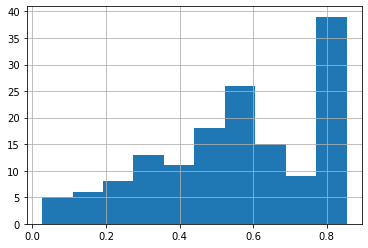

In [14]:
irisDF['silhouette_coeff'].hist()

### 군집 걔수에 따른 K-평균 군집화 실루엣 분석

In [ ]:
# 사이킷런 문서에 들어 있는 예제

In [16]:
from sklearn.datasets import make_blobs

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


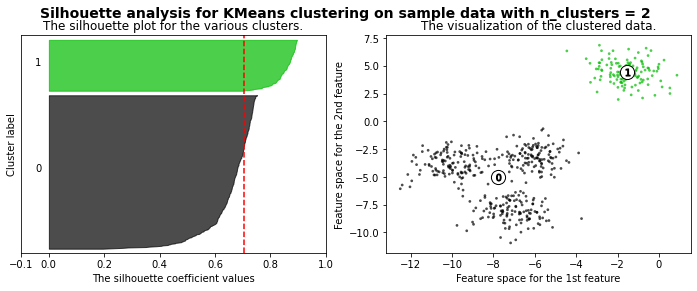

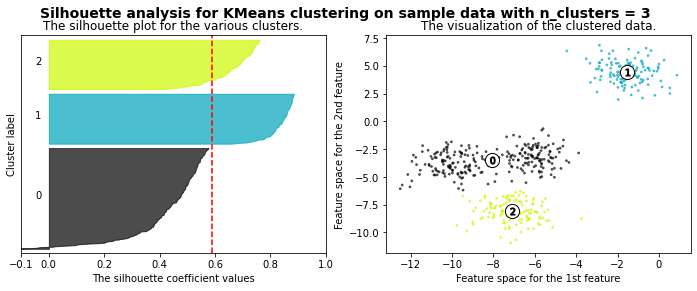

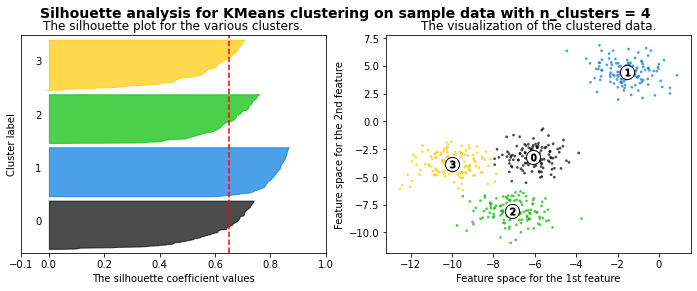

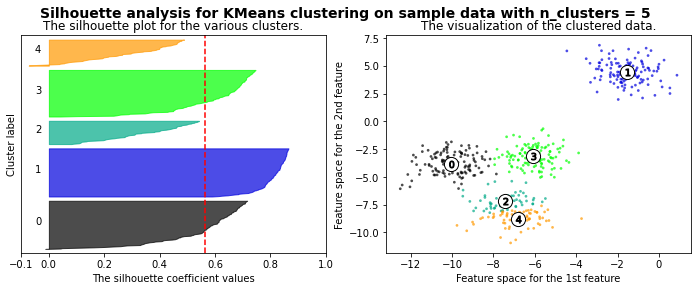

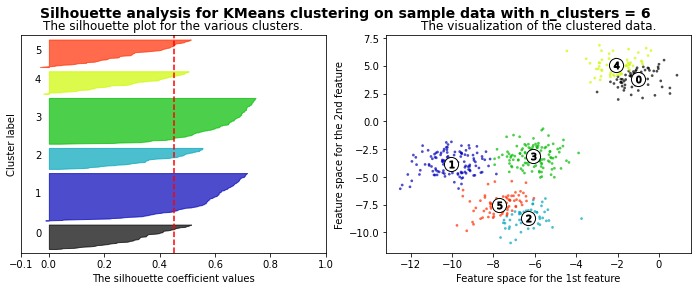

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    fig.set_size_inches(12, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

그래프로 표현
- 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 것
- X축은 실루엣 계수 값이고
- Y축은 개별 군집과 이에 속하는 데이터
- 개별 군집 : 숫자값으로 0, 1로 Y축에 표시 
- 이에 해당하는 데이터는 일일이 숫자 값으로 표시되지 않았지만
- Y축 높이로 추축 가능
- 점선 : 전체 평균 실루엣 계수 값

### 군집의 개수가 2개인 경우

- 평균 실루엣 silhouette_score는 약 0.704로 매우 높게 나타남
- 1번 군집의 모든 데이터는 평균 실루엣 계수 값 이상이지만
- 2번 군집의 경우는 평균보다 작은 데이터 값이 매우 많음

1번 군집의 경우
- 0번 군집과 멀리 떨어져 있고
- 내부 데이터끼리 장 뭉쳐 있음 

0번 군집의 경우
- 내부 데이터끼리 많이 떨어져 있음

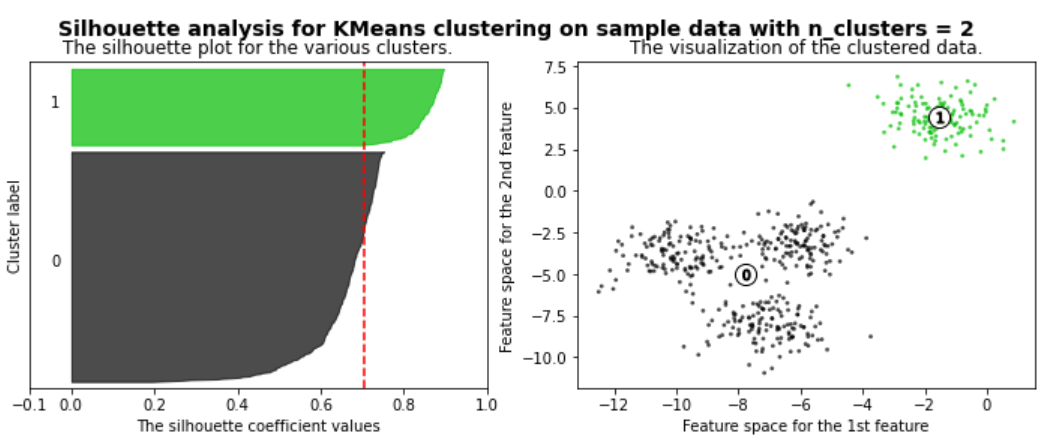

In [ ]:
### 군집의 개수가 3개인 경우

- 전체 평균 실루엣 계수 값은 약 0.588
- 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만
- 0번의 경우 모두 평균 보다 낮음
- 0번의 경우 내부 데이터 간의 거리도 멀지만
- 2번 군집과도 가깝게 위치하고 있음

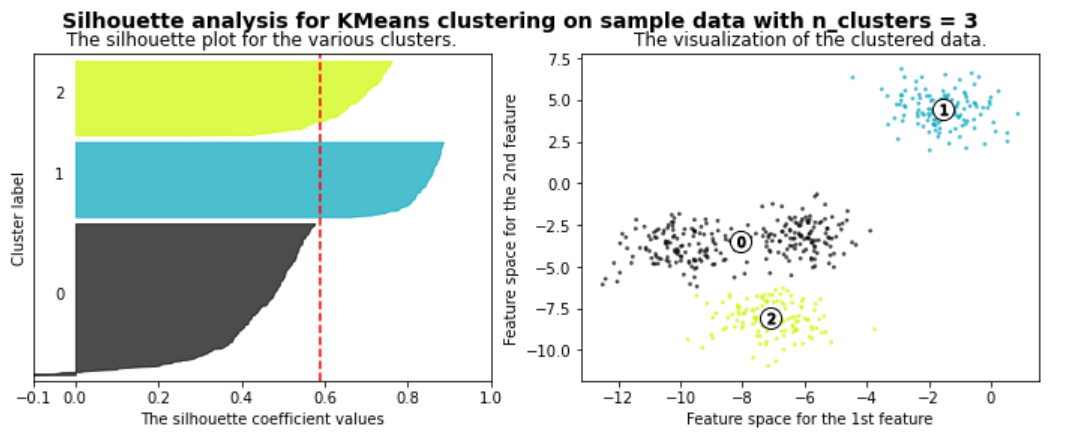

In [21]:
### 군집의 개수가 4개인 경우

- 평균 실루엣 계수 값은 약 0.65
- 개별 군집의 평균 실루에 계수 값이 비교적 균일하게 위치
- 1번 군집의 경우 모든 데이터가 평균보다 높교
- 0번, 2번의 경우 절반 이상이 평균보다 높고
- 3번 군집의 경우만 약 1/3 정도가 평균보다 높음
- 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 (0.704)
- 4개인 경우가 가장 이상적인 군집화 개수로 판단될 수 있음

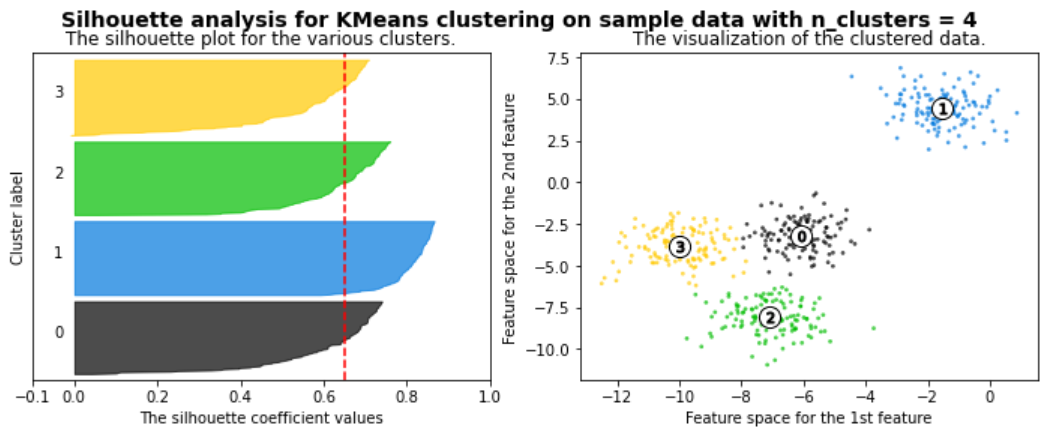

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

왼쪽 그래프의 군집별 평균 실루엣 계수 값을 구하는 부분만 별도의 함수로 만들어 최적화
- visualize_silhouette(cluster_lists, X_features)
- 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때
- 개별 군집별 평균 실루엣 계수값을 시각화해서
- 군집의 개수를 정하는데 도움을 줌

In [ ]:
# 여러 개의 클러스 갯수를 List로 입력받아서 각각의 실루엣 계수를 면적으로 시각화하는 함수 작성

In [24]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


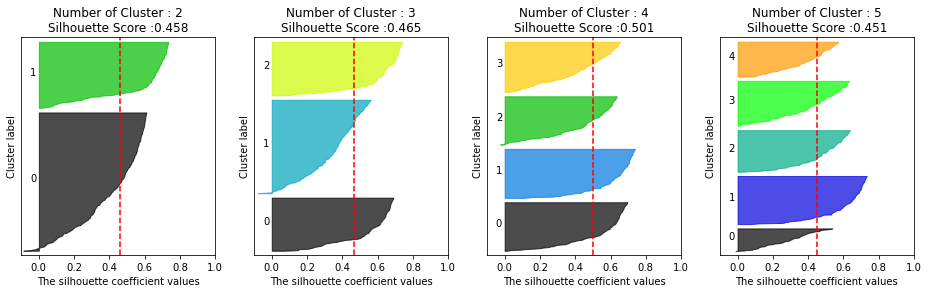

In [27]:
# make_blobs()를 이용해서 클러스터링을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, 
                  center_box=(-10.0, 10.0), shuffle=True, random_state=0)

# cluster 개수를 2, 3, 4, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

# 결과
# 앞에서 확인한 바와 같이
# 4개의 군집일 때 가장 최적이라고 할 수 있겠음

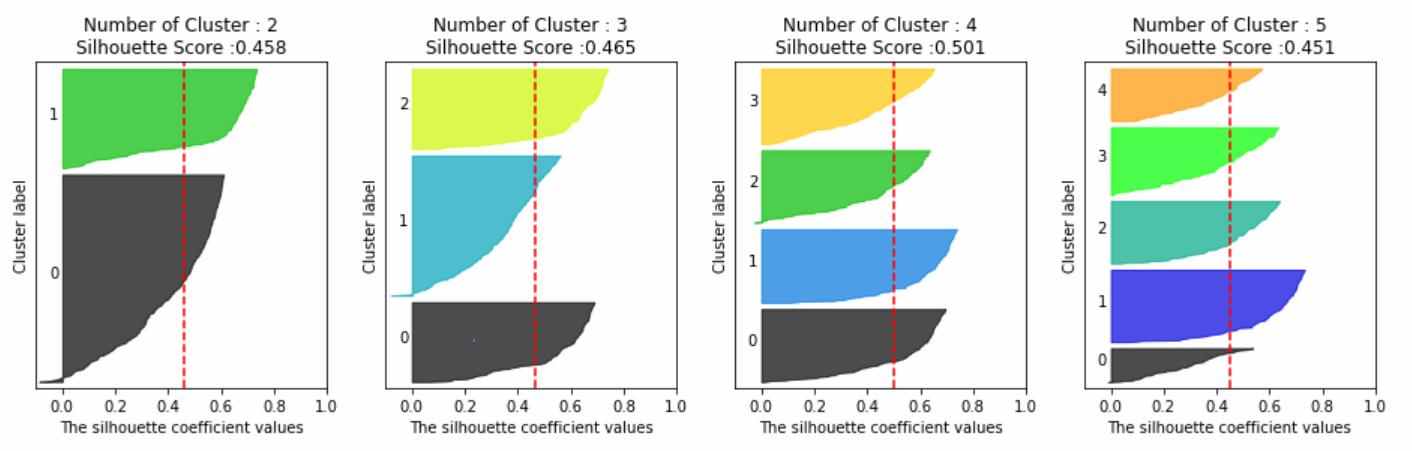

### 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수 확인

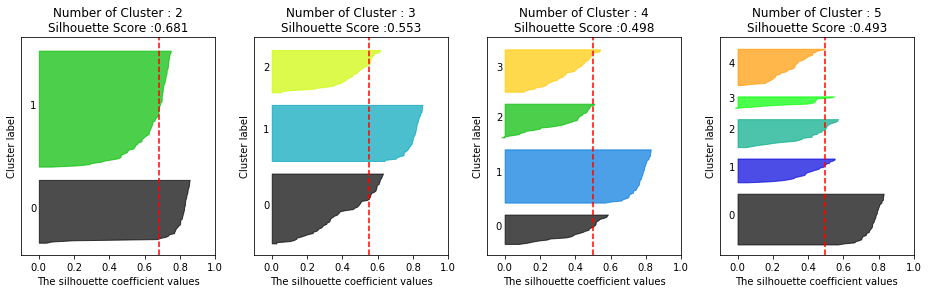

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

# 결과
# 군집 개수를 2개로 하는 것이 가장 좋아 보임
# 3개의 경우 평균 실루엣 계수 값도 2개일 때보다 작을 뿐더라 (0.6 미만)
# 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 큼
# 4~5개의 경우도 마찬가지

In [ ]:
정리
- 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만
- 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로
- 데이터 양이 늘어나면 수행시간이 크게 늘어남

- 특히 몇 만 건 이상의 데이터에 대해
- 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우
- 메모리 부족 등의 에러가 발생하기 쉬움
- 이 경우 군집별로 임의의 데이터를 샘플링해서
- 실루엣 계수를 평가하는 방안을 고민해야 함

### 기타 군집화 알고리즘

In [ ]:
평균 이동 (Mean Shift)
- K-평균과 유사하지만
- 거리 중심이 아니라 데이터가 모여 있는 밀도가 가장 높은 쪽으로
- 군집 중심점을 이동하면서 군집화 수행

- 일반 업무 기반의 정형 데이터 셋보다는
- 컴퓬터 비전 영역에서 이미지나 영상 데이터에서
- 특정 개체를 구분하거나 움직임을 추적하는데
- 뛰어난 역할을 수행

- K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행
- 데이터의 분포도를 이용해 군집 중심점을 찾고
- 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴
- K-평균 : 중심에 소속된 데이터의 평균 거리 중심으로 이동

In [ ]:
GMM(Gaussian Mixture Model)
- 군집화를 적용하고자 하는 데이터가
- 여러 개의 가우시난 분포(정규 분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는
- 가정하에 군집화를 수행하는 방식
- 전체 데이터 셋에서 서로 다른 정규 분포 형태를 추출해서
- 다른 정규 분포를 가진 데이터 셋을 각각 군집화하는 것
- 장점 : K-평균보다 유연하게 다양한 데이터 셋에 잘 적용 가능
- 단점 : 군집화를 위한 수행 시간이 오래 걸림
    
K-평균과 비교
- K-평균 : 원형 번위에서 군집화 수행
- 데이터 셋이 원형의 번위를 가질수록 군집화 효율은 더 높아짐

In [ ]:
DBSCAN(Density Based Spatial Clustering)
- 밀도 기반의 군집화의 대표적인 알고리즘
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서
- 데이터의 분포가 기하하적으로 복잡한 데이터 셋에서도 효과적인 군집화 가능
- K-평균, 평균 이동, GMM으로는 효과적인 군집화를 수행하기 어려운 경우 사용